#Текст задачи

В базе данных нефтегазовых месторождений одной компании произошёл системный сбой и информация о типе месторождения по расположению (на берегу или в открытом море) была удалена. Так как эта информация крайне важна, вам необходимо восстановить её в пострадавшем датасете (https://yadi.sk/d/oTXS7UAIu2OJOg).
Дополнительная ссылка для скачивания: test.csv

В качестве тренировочного датасета можете использовать неиспорченный датасет (https://yadi.sk/d/MmT-_fY6sKzlTmw).
Дополнительная ссылка для скачивания: train.csv
Входные данные: тренировочный датасет train.csv, в котором поля обозначают следующее:

Tectonic regime – тектонический режим месторождения
Onshore/Oﬀshore – тип месторождения по расположению
Hydrocarbon type – тип углеводородов
Reservoir status – статус разработки месторождения
Structural setting – структурные особенности месторождения
Depth – средняя глубина кровли резервуара
Period – геологическая система образования резервуара
Lithology – основной литологический состав коллектора
Gross – среднее значение общей толщины резервуара
Netpay – среднее значение эффективной углеводородонасыщенной толщины коллектора
Porosity – среднее значение матричной пористости
Permeability – среднее значение проницаемости по воздуху.

test.csv – датасет, для которого необходимо предсказать поле «Onshore/Oﬀshore»

Выходные данные: файл prediction.csv, в котором одна колонка (без заголовка) с предсказанием поля Onshore/Oﬀshore. Предсказания следует выводить в тех же значениях, в каких они представлены в тренировочном датасете (ONSHORE/OFFSHORE/ ONSHORE-OFFSHORE).

Критерии проверки: вычисляется точность предсказания (accuracy_score), округляется до 2-х знаков и итоговый балл считается по формуле score = 50*accuracy_score. Таким образом максимальный балл 50 будет соответствовать максимально точности 1.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Знакомство с данными

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/YA_PROFI/1/train.csv", sep=",")
df_train

Tectonic regime  ... Permeability
0            STRIKE-SLIP/TRANSPRESSION/BASEMENT-I  ...         45.0
1                     GRAVITY/EXTENSION/EVAPORITE  ...        175.0
2                     GRAVITY/EXTENSION/EVAPORITE  ...         20.0
3                                     COMPRESSION  ...        600.0
4                 INVERSION/COMPRESSION/EXTENSION  ...        182.0
..                                            ...  ...          ...
304  GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION  ...       1500.0
305               INVERSION/COMPRESSION/EXTENSION  ...       7500.0
306                         COMPRESSION/EVAPORITE  ...          0.8
307     INVERSION/COMPRESSION/EXTENSION/EVAPORITE  ...         10.0
308                                     EXTENSION  ...        340.0

[309 rows x 12 columns]

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/YA_PROFI/1/test.csv", sep=",")
df_test

Tectonic regime  ... Permeability
0                                         COMPRESSION  ...         0.04
1             INVERSION/COMPRESSION/EXTENSION/EROSION  ...       240.00
2           INVERSION/COMPRESSION/EXTENSION/EVAPORITE  ...         7.30
3              COMPRESSION/EVAPORITE/EXTENSION/LINKED  ...       100.00
4                                 COMPRESSION/EROSION  ...       125.00
..                                                ...  ...          ...
128                                 EXTENSION/EROSION  ...      1000.00
129                               COMPRESSION/EROSION  ...       440.00
130  COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I  ...        75.00
131                   INVERSION/COMPRESSION/EXTENSION  ...      1000.00
132                             COMPRESSION/EVAPORITE  ...       195.00

[133 rows x 11 columns]

##Статистика

In [ ]:
df_train.describe(include='all')

Tectonic regime Onshore/Offshore  ...    Porosity Permeability
count              309              309  ...  309.000000   309.000000
unique              56                3  ...         NaN          NaN
top        COMPRESSION          ONSHORE  ...         NaN          NaN
freq                58              211  ...         NaN          NaN
mean               NaN              NaN  ...   17.929709   463.048544
std                NaN              NaN  ...    7.644533   981.882456
min                NaN              NaN  ...    1.300000     0.010000
25%                NaN              NaN  ...   12.000000    10.000000
50%                NaN              NaN  ...   17.000000    90.000000
75%                NaN              NaN  ...   24.000000   450.000000
max                NaN              NaN  ...   55.000000  7500.000000

[11 rows x 12 columns]

##Проверка на нулевые значения

In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_test.isnull().values.any()

False

#Перекодирование

##Целевая переменная

In [ ]:
set(df_train['Onshore/Offshore'])

{'OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'}

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_train['Onshore/Offshore'] = LE.fit_transform(df_train['Onshore/Offshore'])

#df_train

In [ ]:
LE.classes_

array([0, 1, 2])

In [ ]:
df_train['Onshore/Offshore'].replace(['OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'], [0, 1, 2], inplace=True)

##Прочие

In [ ]:
set(df_train['Tectonic regime'])

{'COMPRESSION',
 'COMPRESSION/EROSION',
 'COMPRESSION/EROSION/EXTENSION',
 'COMPRESSION/EROSION/EXTENSION/LINKED',
 'COMPRESSION/EROSION/GRAVITY/EVAPORITE/EXTENSION',
 'COMPRESSION/EVAPORITE',
 'COMPRESSION/EVAPORITE/EXTENSION/LINKED',
 'COMPRESSION/EVAPORITE/GRAVITY',
 'COMPRESSION/EXTENSION/EROSION',
 'COMPRESSION/EXTENSION/EROSION/EVAPORITE',
 'COMPRESSION/EXTENSION/EVAPORITE',
 'COMPRESSION/EXTENSION/LINKED',
 'COMPRESSION/EXTENSION/LINKED/EROSION',
 'COMPRESSION/GRAVITY/EVAPORITE/EXTENSION/LINKED',
 'COMPRESSION/SHALE',
 'COMPRESSION/SHALE/REACTIVATION/BASEMENT-I',
 'COMPRESSION/STRIKE-SLIP/BASEMENT-I',
 'COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I',
 'COMPRESSION/STRIKE-SLIP/TRANSPRESSION/SHALE/BASEMENT-I',
 'EVAPORITE/INVERSION/COMPRESSION/EXTENSION',
 'EXTENSION',
 'EXTENSION/COMPRESSION',
 'EXTENSION/EROSION',
 'EXTENSION/EROSION/GRAVITY/EVAPORITE',
 'EXTENSION/EVAPORITE',
 'EXTENSION/EVAPORITE/EROSION/GRAVITY',
 'EXTENSION/EVAPORITE/GRAVITY',
 'EXTENSION/EVAPORITE/INVERS

In [ ]:
set(df_train['Hydrocarbon type'])

{'CARBON DIOXIDE', 'GAS', 'GAS-CONDENSATE', 'METHANE HYDRATE', 'OIL'}

In [ ]:
set(df_train['Reservoir status'])

{'ABANDONED',
 'CONTINUING DEVELOPMENT',
 'DECLINING PRODUCTION',
 'DEPLETED',
 'DEVELOPING',
 'MATURE PRODUCTION',
 'NEARLY DEPLETED',
 'PLATEAU PRODUCTION',
 'REJUVENATING',
 'SECOND PLATEAU PRODUTION',
 'UNDEVELOPED',
 'UNKNOWN'}

In [ ]:
set(df_train['Structural setting'])

{'BACKARC',
 'DELTA//FORELAND',
 'DELTA/FORELAND',
 'DELTA/PASSIVE MARGIN',
 'DELTA/SALT/PASSIVE MARGIN',
 'DELTA/SUB-SALT/PASSIVE MARGIN',
 'DELTA/WRENCH',
 'FORELAND',
 'FORELAND/PASSIVE MARGIN',
 'FORELAND/SALT',
 'FORELAND/THRUST',
 'FORELAND/WRENCH',
 'INTRACRATONIC',
 'INTRACRATONIC/SUB-SALT',
 'INVERSION/BACKARC',
 'INVERSION/FOREARC',
 'INVERSION/FORELAND',
 'INVERSION/RIFT',
 'INVERSION/SALT/RIFT',
 'INVERSION/WRENCH',
 'PASSIVE MARGIN',
 'RIFT',
 'RIFT/INVERSION',
 'RIFT/PASSIVE MARGIN',
 'RIFT/SALT',
 'SALT/FORELAND',
 'SALT/INVERSION/FORELAND',
 'SALT/INVERSION/RIFT',
 'SALT/PASSIVE MARGIN',
 'SALT/RIFT',
 'SUB-SALT',
 'SUB-SALT/FORELAND',
 'SUB-SALT/INVERSION',
 'SUB-SALT/PASSIVE MARGIN',
 'SUB-SALT/RIFT',
 'SUB-THRUST',
 'SUB-THRUST/FORELAND',
 'THRUST',
 'THRUST/FORELAND',
 'THRUST/PASSIVE MARGIN',
 'THRUST/SUB-THRUST/FORELAND',
 'THRUST/WRENCH',
 'WRENCH',
 'WRENCH/DELTA',
 'WRENCH/FORELAND',
 'WRENCH/INVERSION/BACKARC',
 'WRENCH/RIFT',
 'WRENCH/THRUST'}

In [ ]:
set(df_train['Period'])

{'ARCHEAN',
 'CAMBRIAN',
 'CAMBRIAN-ORDOVICIAN',
 'CARBONIFEROUS',
 'CARBONIFEROUS-CRETACEOUS',
 'CARBONIFEROUS-PERMIAN',
 'CRETACEOUS',
 'CRETACEOUS-PALEOGENE',
 'DEVONIAN',
 'JURASSIC',
 'JURASSIC-CRETACEOUS',
 'MESOZOIC',
 'NEOGENE',
 'ORDOVICIAN',
 'PALEOGENE',
 'PALEOGENE-NEOGENE',
 'PALEOZOIC',
 'PERMIAN',
 'PROTEROZOIC',
 'PROTEROZOIC-CAMBRIAN',
 'TRIASSIC',
 'TRIASSIC-JURASSIC'}

In [ ]:
set(df_train['Lithology'])

{'BASEMENT',
 'CHALK',
 'CHALKY LIMESTONE',
 'CHERT',
 'CONGLOMERATE',
 'DIATOMITE',
 'DOLOMITE',
 'DOLOMITIC LIMESTONE',
 'LIMESTONE',
 'LOW-RESISTIVITY SANDSTONE',
 'SANDSTONE',
 'SHALE',
 'SHALY SANDSTONE',
 'SILTSTONE',
 'THINLY-BEDDED SANDSTONE',
 'VOLCANICS'}

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df_train['Tectonic regime'] = LE.fit_transform(df_train['Tectonic regime'])
df_train['Hydrocarbon type'] = LE.fit_transform(df_train['Hydrocarbon type'])
df_train['Reservoir status'] = LE.fit_transform(df_train['Reservoir status'])
df_train['Structural setting'] = LE.fit_transform(df_train['Structural setting'])
df_train['Period'] = LE.fit_transform(df_train['Period'])
df_train['Lithology'] = LE.fit_transform(df_train['Lithology'])

df_train

Tectonic regime  Onshore/Offshore  ...  Porosity  Permeability
0                 51                 0  ...      20.0          45.0
1                 33                 0  ...      19.0         175.0
2                 33                 1  ...      12.0          20.0
3                  0                 1  ...      13.0         600.0
4                 41                 1  ...      24.0         182.0
..               ...               ...  ...       ...           ...
304               36                 0  ...      29.0        1500.0
305               41                 0  ...      32.0        7500.0
306                5                 1  ...      13.0           0.8
307               43                 0  ...      16.0          10.0
308               20                 1  ...      14.0         340.0

[309 rows x 12 columns]

In [ ]:
df_test['Tectonic regime'] = LE.fit_transform(df_test['Tectonic regime'])
df_test['Hydrocarbon type'] = LE.fit_transform(df_test['Hydrocarbon type'])
df_test['Reservoir status'] = LE.fit_transform(df_test['Reservoir status'])
df_test['Structural setting'] = LE.fit_transform(df_test['Structural setting'])
df_test['Period'] = LE.fit_transform(df_test['Period'])
df_test['Lithology'] = LE.fit_transform(df_test['Lithology'])

df_test

Tectonic regime  Hydrocarbon type  ...  Porosity  Permeability
0                  0                 2  ...      13.0          0.04
1                 23                 4  ...      28.0        240.00
2                 24                 2  ...      13.0          7.30
3                  4                 4  ...      18.0        100.00
4                  1                 3  ...      12.0        125.00
..               ...               ...  ...       ...           ...
128               10                 4  ...      26.0       1000.00
129                1                 0  ...      28.0        440.00
130                8                 4  ...      20.0         75.00
131               22                 4  ...      28.0       1000.00
132                3                 4  ...      18.0        195.00

[133 rows x 11 columns]

In [ ]:
df_train.describe()

Tectonic regime  Onshore/Offshore  ...    Porosity  Permeability
count       309.000000        309.000000  ...  309.000000    309.000000
mean         20.294498          0.715210  ...   17.929709    463.048544
std          17.551612          0.486635  ...    7.644533    981.882456
min           0.000000          0.000000  ...    1.300000      0.010000
25%           1.000000          0.000000  ...   12.000000     10.000000
50%          20.000000          1.000000  ...   17.000000     90.000000
75%          36.000000          1.000000  ...   24.000000    450.000000
max          55.000000          2.000000  ...   55.000000   7500.000000

[8 rows x 12 columns]

In [ ]:
df_train.dtypes

Tectonic regime         int64
Onshore/Offshore        int64
Hydrocarbon type        int64
Reservoir status        int64
Structural setting      int64
Depth                   int64
Period                  int64
Lithology               int64
Gross                 float64
Netpay                float64
Porosity              float64
Permeability          float64
dtype: object

#Корреляции

In [ ]:
correlation = df_train.corr()
correlation

Tectonic regime  Onshore/Offshore  ...  Porosity  Permeability
Tectonic regime            1.000000         -0.437939  ...  0.295016      0.207260
Onshore/Offshore          -0.437939          1.000000  ... -0.225753     -0.071021
Hydrocarbon type          -0.121857          0.024013  ...  0.203226      0.176997
Reservoir status          -0.025536          0.052547  ...  0.021303     -0.034973
Structural setting         0.253798         -0.111894  ...  0.123779      0.026555
Depth                      0.004043         -0.176105  ... -0.423527     -0.281946
Period                     0.195706         -0.106430  ... -0.003037      0.037136
Lithology                  0.129359         -0.021659  ...  0.197488      0.207268
Gross                      0.029826         -0.105874  ... -0.002646     -0.115535
Netpay                     0.077367         -0.198682  ... -0.024455     -0.115753
Porosity                   0.295016         -0.225753  ...  1.000000      0.485064
Permeability               0.207260         -0.071021  ...  0.485064      1.000000

[12 rows x 12 columns]

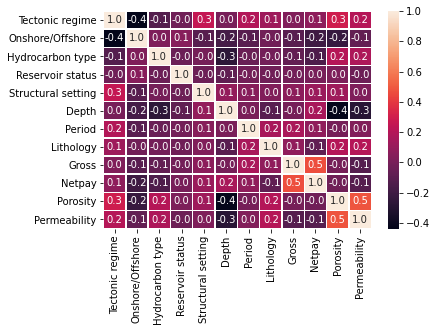

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

heatmap = sb.heatmap(correlation, annot=True, fmt=".1f", linewidths=.5)
plt.show()

#Сплиттинг

In [ ]:
target = df_train["Onshore/Offshore")]

In [ ]:
target.value_counts()

1    211
0     93
2      5
Name: Onshore/Offshore, dtype: int64

In [ ]:
df_train

Tectonic regime  Onshore/Offshore  ...  Porosity  Permeability
0                 51                 0  ...      20.0          45.0
1                 33                 0  ...      19.0         175.0
2                 33                 1  ...      12.0          20.0
3                  0                 1  ...      13.0         600.0
4                 41                 1  ...      24.0         182.0
..               ...               ...  ...       ...           ...
304               36                 0  ...      29.0        1500.0
305               41                 0  ...      32.0        7500.0
306                5                 1  ...      13.0           0.8
307               43                 0  ...      16.0          10.0
308               20                 1  ...      14.0         340.0

[309 rows x 12 columns]

In [ ]:
columns_for_x = ['Tectonic regime', 'Hydrocarbon type', 'Reservoir status', 'Structural setting',
                 'Depth', 'Period', 'Lithology', 'Gross', 'Netpay', 'Porosity', 'Permeability']

In [ ]:
X = df_train[columns_for_x]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, target, test_size=0.2, random_state=17, stratify=target)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((247, 11), (62, 11), (247,), (62,))

#Модели

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, f1_score, make_scorer, classification_report

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [ ]:
my_scorer = make_scorer(f1_score, average='macro')
skv = StratifiedKFold(5)

##Простая регрессия

In [ ]:
%%time

tuned_parameters = [{'C': [50, 100, 300]}]

LR_clf = GridSearchCV(
    LogisticRegression(solver='liblinear', random_state=17, class_weight={1:1, 0:2, 2:40}), 
    tuned_parameters,
    scoring=my_scorer, 
    cv=skv, 
    verbose=1, 
    n_jobs=-1)

LR_clf.fit(x_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 90.8 ms, sys: 23.4 ms, total: 114 ms
Wall time: 1.36 s


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.3s finished


In [ ]:
LR_clf.best_estimator_

LogisticRegression(C=50, class_weight={0: 2, 1: 1, 2: 40}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_LR = LogisticRegression(C=50, class_weight={0: 2, 1: 1, 2: 40}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
best_LR.fit(x_train, y_train)

LogisticRegression(C=50, class_weight={0: 2, 1: 1, 2: 40}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_true, y_pred = y_val, best_LR.predict(x_val)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.88      0.71      0.79        42
           2       0.00      0.00      0.00         1

    accuracy                           0.71        62
   macro avg       0.50      0.48      0.49        62
weighted avg       0.78      0.71      0.74        62



##Полиномы

###2й степени

In [ ]:
# for poly degree == 2

my_pipe2 = Pipeline([('Poly', PolynomialFeatures(2)), ('Lin_reg', LogisticRegression(C=50, class_weight={0: 2, 1: 1, 2: 40}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=300, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False))])

In [ ]:
my_pipe2.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('Poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('Lin_reg',
                 LogisticRegression(C=50, class_weight={0: 2, 1: 1, 2: 40},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=300, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=17,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
y_pred2 = my_pipe2.predict(x_val)

In [ ]:
y_true, y_pred2 = y_val, y_pred2
print(classification_report(y_true, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.90      0.88      0.89        42
           2       0.00      0.00      0.00         1

    accuracy                           0.82        62
   macro avg       0.53      0.54      0.54        62
weighted avg       0.83      0.82      0.82        62



In [ ]:
y_pred2

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
LE.inverse_transform(y_pred2)

array(['CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALK', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALK', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALK',
       'CHALKY LIMESTONE', 'CHALK', 'CHALK', 'CHALKY LIMESTONE', 'CHALK',
       'DOLOMITE', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALK',
       'CHALKY LIMESTONE', 'CHALK', 'CHALKY LIMESTONE', 'CHALK',
       'CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALK', 'CHALK', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALK', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALK', 'CHALK', 'CHALK', 'CHALKY LIMESTONE',
       'CHALK', 'CHALKY LIMESTONE', 'CHALKY LIMESTONE',
       'CHALKY LIMESTONE', 'CHALK', 'CH

#Аутпут

In [ ]:
df_test

Tectonic regime  Hydrocarbon type  ...  Porosity  Permeability
0                  0                 2  ...      13.0          0.04
1                 23                 4  ...      28.0        240.00
2                 24                 2  ...      13.0          7.30
3                  4                 4  ...      18.0        100.00
4                  1                 3  ...      12.0        125.00
..               ...               ...  ...       ...           ...
128               10                 4  ...      26.0       1000.00
129                1                 0  ...      28.0        440.00
130                8                 4  ...      20.0         75.00
131               22                 4  ...      28.0       1000.00
132                3                 4  ...      18.0        195.00

[133 rows x 11 columns]

In [ ]:
x_test = df_test.values

In [ ]:
x_test

array([[0.00e+00, 2.00e+00, 4.00e+00, ..., 3.00e+01, 1.30e+01, 4.00e-02],
       [2.30e+01, 4.00e+00, 0.00e+00, ..., 1.80e+01, 2.80e+01, 2.40e+02],
       [2.40e+01, 2.00e+00, 2.00e+00, ..., 2.00e+01, 1.30e+01, 7.30e+00],
       ...,
       [8.00e+00, 4.00e+00, 5.00e+00, ..., 1.50e+02, 2.00e+01, 7.50e+01],
       [2.20e+01, 4.00e+00, 8.00e+00, ..., 2.00e+01, 2.80e+01, 1.00e+03],
       [3.00e+00, 4.00e+00, 5.00e+00, ..., 7.50e+01, 1.80e+01, 1.95e+02]])

In [ ]:
predictions = my_pipe2.predict(x_test)

In [ ]:
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1])

In [ ]:
df_output=pd.DataFrame(predictions)

In [ ]:
df_output[0].replace([0, 1, 2], ['OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'], inplace=True)

In [ ]:
#output = LE.inverse_transform(predictions)

In [ ]:
df_output

0
0     ONSHORE
1     ONSHORE
2     ONSHORE
3    OFFSHORE
4     ONSHORE
..        ...
128  OFFSHORE
129   ONSHORE
130   ONSHORE
131   ONSHORE
132   ONSHORE

[133 rows x 1 columns]

In [ ]:
from google.colab import files
df_output.to_csv('prediction.csv', index=False, header=False) 
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>